<a href="https://colab.research.google.com/github/Taiga-U/bug-free-umbrella/blob/main/makegraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving accum.dat to accum.dat


{'accum.dat': b'   1   16     0.0100000   10        12555  2.152878e+01   -5.456650e-01  4.400759e-05   6.640625e-04  5.009215e-05   1.399229e+02  1.849101e-01   8.258481e+01  9.001785e-02   5.428695e+00  7.574156e-03   5.738903e+01  1.230395e-01   3.013800e-01  2.486252e-04   1.789423e-01  2.530230e-04  1.326148e+01  3.012035e-02  1.050335e+01  8.583877e-03  6.896410e+00  0.000000e+00  2.977242e+03  3.440425e-01\n   1   16     0.0200000   10         6505  1.062379e+01   -5.456599e-01  4.951431e-05   1.633398e-02  3.615017e-04   1.311280e+02  2.204580e-01   3.588194e+01  6.827708e-02   5.446310e+00  9.977832e-03   5.758078e+01  1.627863e-01   3.013862e-01  3.794115e-04   1.783843e-01  1.437259e-04  1.296509e+01  2.802425e-02  1.052126e+01  1.496723e-02  6.919132e+00  0.000000e+00  7.441735e+02  1.165631e-01\n   1   16     0.0500000   10         2813  4.339553e+00   -5.452962e-01  7.439312e-05   5.064375e-02  2.695739e-04   8.147639e+01  1.496431e-01   7.131142e+00  1.115447e-02   5.439

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [4]:
data = np.loadtxt("./accum.dat")

温度だけデータ配列の要素を入れてください

In [5]:
temp = data[0:34,2]
print(temp)
n = len(temp)
print(n)

energy16 = data[0:n,6]
energy_err16 = data[0:n,7]
energy32 = data[n:2*n,6]
energy_err32 = data[n:2*n,7]
energy64 = data[2*n:3*n,6]
energy_err64 = data[2*n:3*n,7]


usus16 = data[0:n,8]
usus_err16 = data[0:n,9]
usus32 = data[n:2*n,8]
usus_err32 = data[n:2*n,9]
usus64 = data[2*n:3*n,8]
usus_err64 = data[2*n:3*n,9]


ssus16 = data[0:n,10]
ssus_err16 = data[0:n,11]
ssus32 = data[n:2*n,10]
ssus_err32 = data[n:2*n,11]
ssus64 = data[2*n:3*n,10]
ssus_err64 = data[2*n:3*n,11]


dynamic_S16 = data[0:n,12]
dynamic_S_err16 = data[0:n,13]
dynamic_S32 = data[n:2*n,12]
dynamic_S_err32 = data[n:2*n,13]
dynamic_S64 = data[2*n:3*n,12]
dynamic_S_err64 = data[2*n:3*n,13]


static_S16 = data[0:n,14]
static_S_err16 = data[0:n,15]
static_S32 = data[n:2*n,14]
static_S_err32 = data[n:2*n,15]
static_S64 = data[2*n:3*n,14]
static_S_err64 = data[2*n:3*n,15]


Nz16 = data[0:n,16]
Nz_err16 = data[0:n,17]
Nz32 = data[n:2*n,16]
Nz_err32 = data[n:2*n,17]
Nz64 = data[2*n:3*n,16]
Nz_err64 = data[2*n:3*n,17]


static_S216 = data[0:n,18]
static_S2_err16 = data[0:n,19]
static_S232 = data[n:2*n,18]
static_S2_err32 = data[n:2*n,19]
static_S264 = data[2*n:3*n,18]
static_S2_err64 = data[2*n:3*n,19]


static_S316 = data[0:n,20]
static_S3_err16 = data[0:n,21]
static_S332 = data[n:2*n,20]
static_S3_err32 = data[n:2*n,21]
static_S364 = data[2*n:3*n,20]
static_S3_err64 = data[2*n:3*n,21]


inverse_gap16 = data[0:n,22]
inverse_gap_err16 = data[0:n,23]
inverse_gap32 = data[n:2*n,22]
inverse_gap_err32 = data[n:2*n,23]
inverse_gap64 = data[2*n:3*n,22]
inverse_gap_err64 = data[2*n:3*n,23]


correlation_length_x16 = data[0:n,24]
correlation_length_x_err16 = data[0:n,25]
correlation_length_x32 = data[n:2*n,24]
correlation_length_x_err32 = data[n:2*n,25]
correlation_length_x64 = data[2*n:3*n,24]
correlation_length_x_err64 = data[2*n:3*n,25]


correlation_length_y16 = data[0:n,26]
correlation_length_y_err16 = data[0:n,27]
correlation_length_y32 = data[n:2*n,26]
correlation_length_y_err32 = data[n:2*n,27]
correlation_length_y64 = data[2*n:3*n,26]
correlation_length_y_err64 = data[2*n:3*n,27]

[0.01 0.02 0.05 0.08 0.1  0.12 0.15 0.2  0.22 0.25 0.28 0.5  0.8  1.
 1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
 4.   4.2  4.4  4.6  4.8  5.  ]
34


In [6]:
# 藤井 岳 キュリーワイスフィッティングの関数
def CW_fit(xx,yy,t_low,t_high,M_atom_number):
    temp_range = (t_low<xx)&(xx<t_high)
    
    def line(xx,a,c):
        yy = a*xx + c
        return yy
    
    results,err = optimize.curve_fit(line, xx[temp_range], yy[temp_range])
    # print(results)
    
    mu = 3*1.3806E-16*(1/(results[0]))/(6.022E+23)/(9.274E-21)**2
    # print(mu)
    return np.sqrt(mu/M_atom_number), -results[1]/results[0], results[0], results[1]

def line(xx,a,c):
        yy = a*xx + c
        return yy

In [7]:
#　グラフ微調整
# plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ

# グラフの大きさ
lx_graph = 5
ly_graph = 4


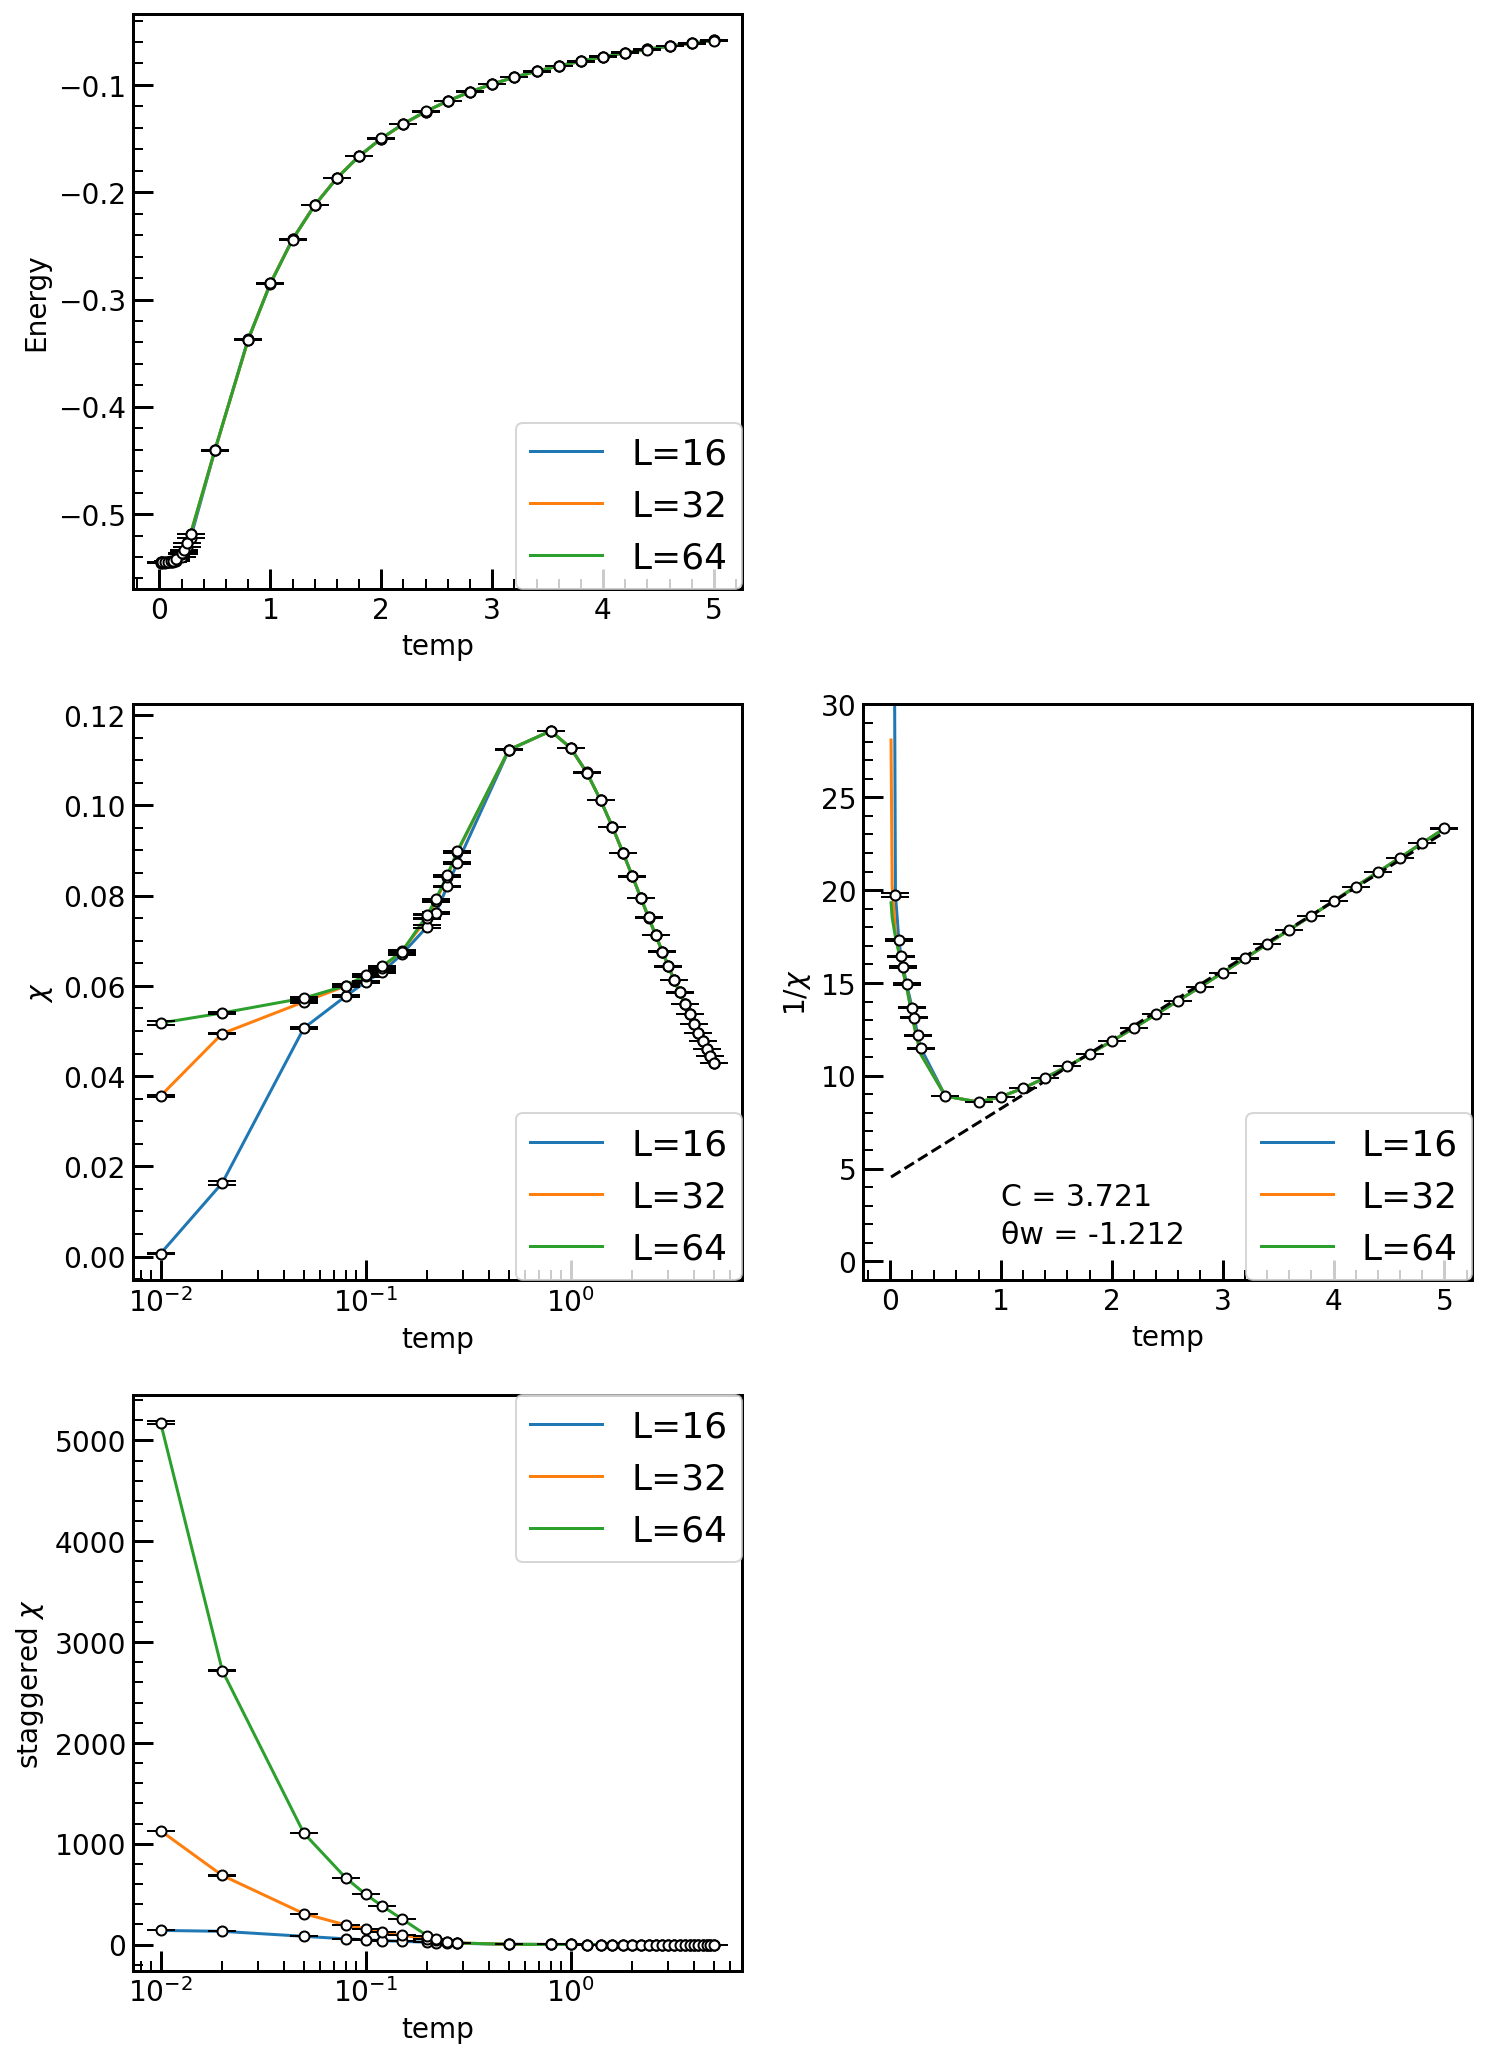

In [37]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2


ax1 = fig.add_subplot(gyou,retsu,1)
ax1.plot(temp, energy16,label="L=16")
ax1.plot(temp, energy32,label="L=32")
ax1.plot(temp, energy64,label="L=64")
ax1.errorbar(temp, energy16, yerr = energy_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp, energy32, yerr = energy_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp, energy64, yerr = energy_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("Energy")
ax1.set_xlabel("temp")
ax1.legend(loc=4, borderaxespad=0, fontsize=18)


ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp, usus16, label="L=16")
ax3.plot(temp, usus32, label="L=32")
ax3.plot(temp, usus64, label="L=64")
ax3.errorbar(temp, usus16, yerr = usus_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.errorbar(temp, usus32, yerr = usus_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.errorbar(temp, usus64, yerr = usus_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("$\\chi$")
ax3.set_xscale('log')
ax3.set_xlabel("temp")
ax3.legend(loc=4, borderaxespad=0, fontsize=18)


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp, 1/usus16, label="L=16")
ax4.plot(temp, 1/usus32, label="L=32")
ax4.plot(temp, 1/usus64, label="L=64")
ax4.errorbar(temp, 1/usus16, yerr = usus_err16/(usus16)**2, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax4.set_ylabel("1/$\chi$")
ax4.set_xlabel("temp")
# ax4.set_xscale('log')
ax4.set_ylim(-1,30)
# ax4.set_ylim(-1,22)
ax4.legend(loc=4, borderaxespad=0, fontsize=18)
#以下は最小二乗法
chaifit = CW_fit(temp,1/usus16, 1,5,1)
x = temp
y = chaifit[2]*x + chaifit[3]
ax4.plot(x,y,"--",color = "0")
ax4.text(1,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
ax4.text(1,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp, ssus16, label="L=16")
ax5.plot(temp, ssus32, label="L=32")
ax5.plot(temp, ssus64, label="L=64")
ax5.errorbar(temp, ssus16, yerr = ssus_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.errorbar(temp, ssus32, yerr = ssus_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.errorbar(temp, ssus64, yerr = ssus_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("staggered $\chi$")
# ax2.set_xlim(0,1)
ax5.set_xscale('log')
ax5.set_xlabel("temp")
ax5.legend(loc=1, borderaxespad=0, fontsize=18)

plt.show()

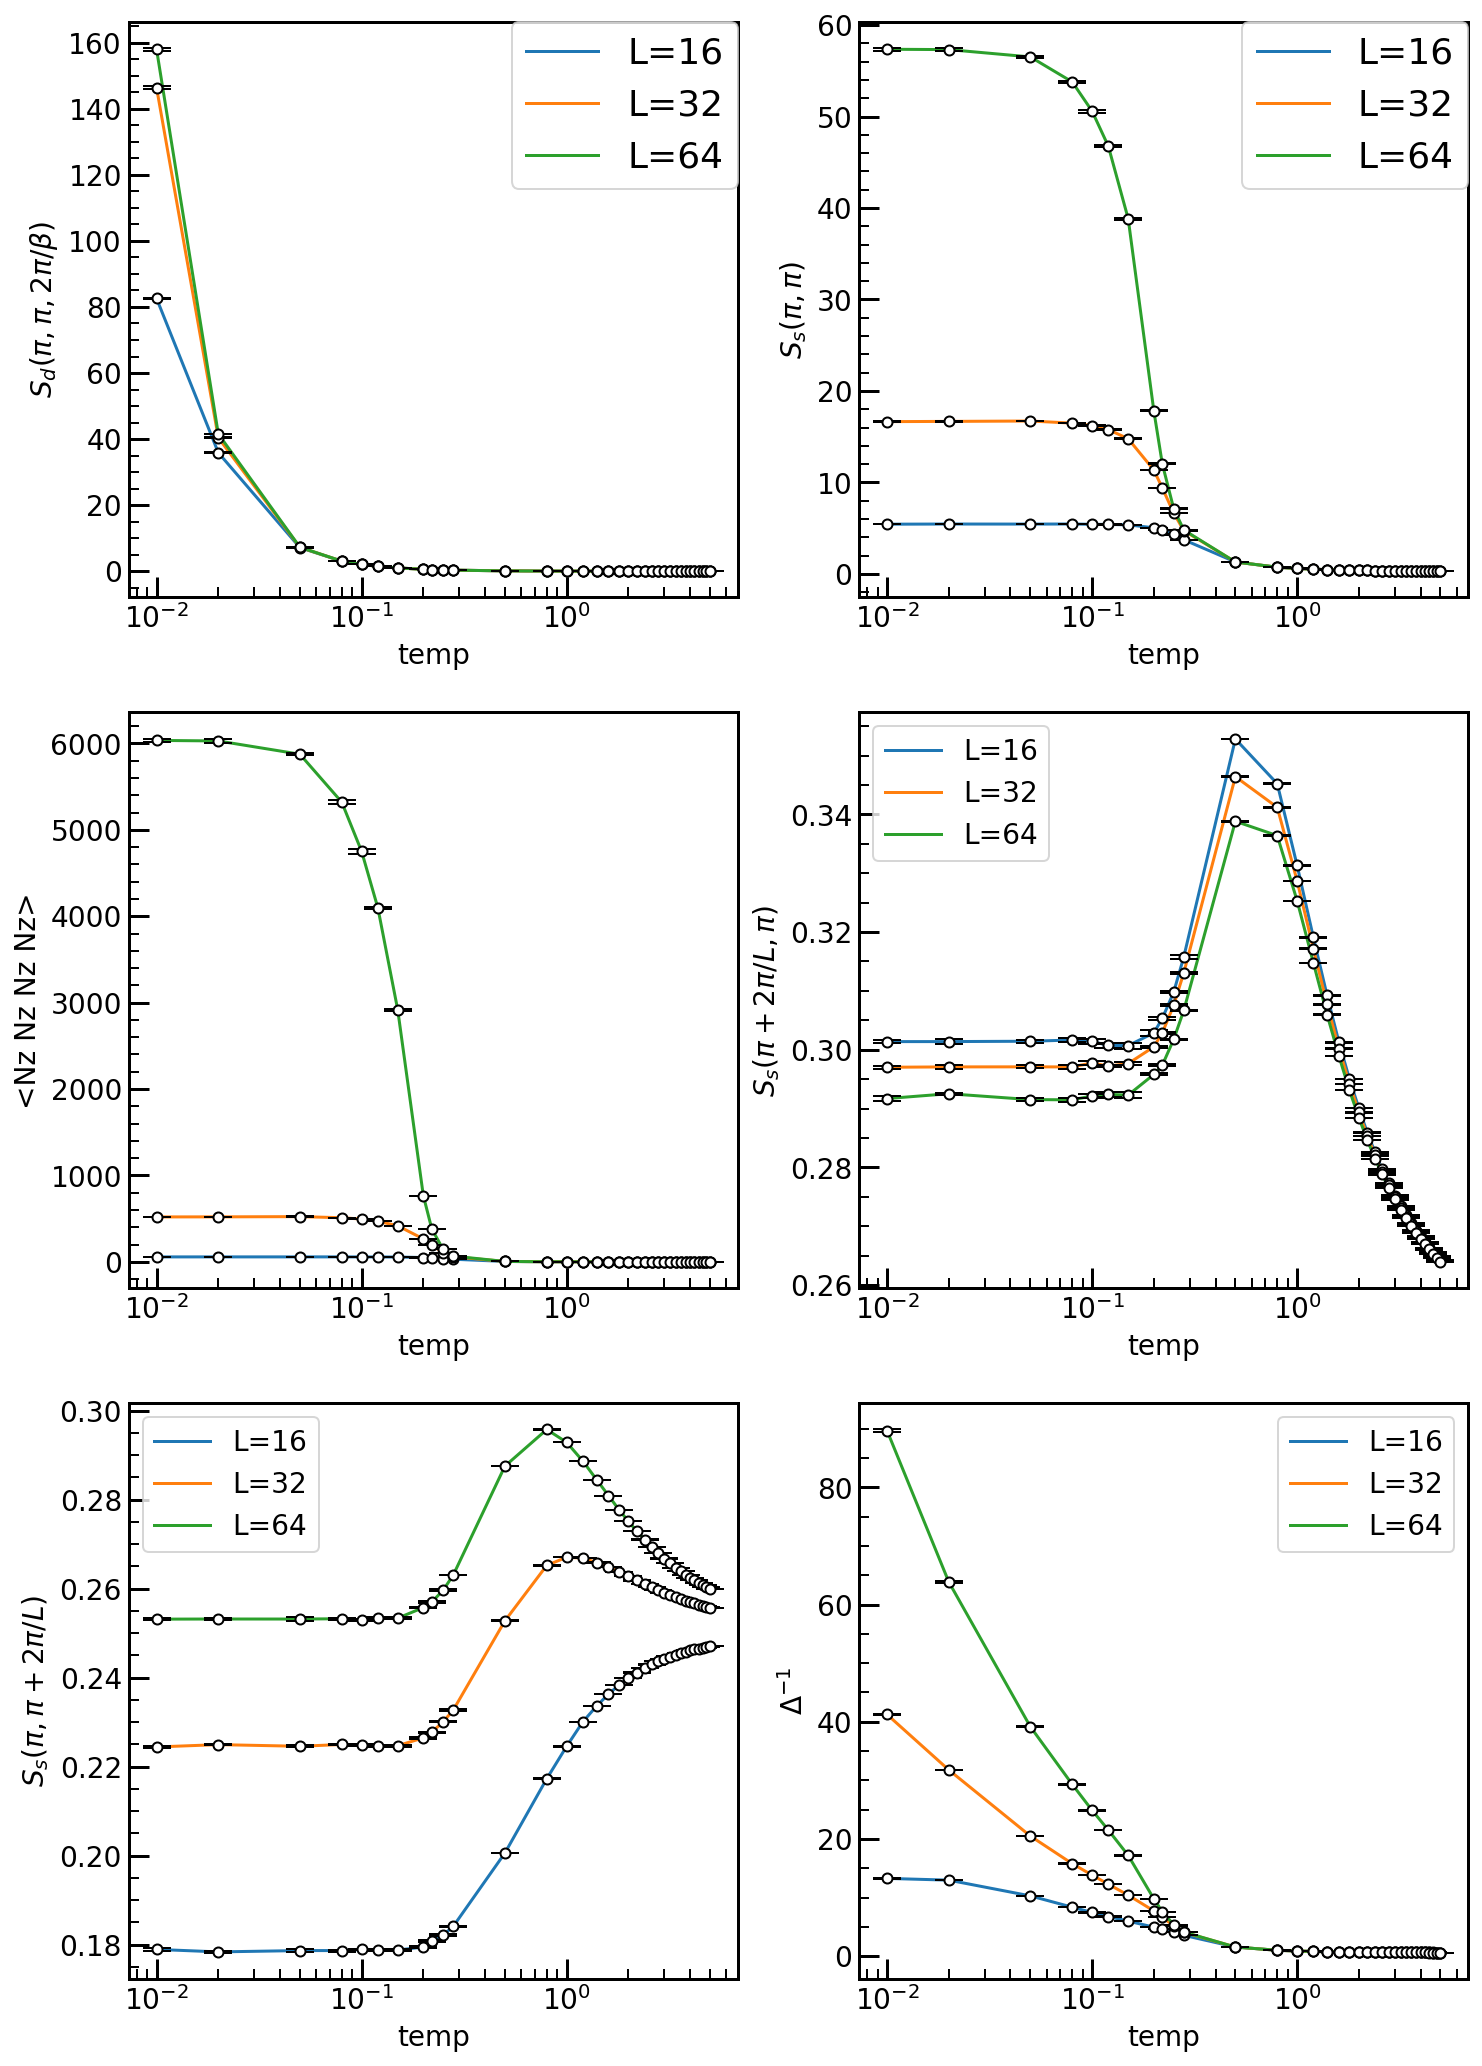

In [62]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2


ax1 = fig.add_subplot(gyou,retsu,1)
ax1.plot(temp, dynamic_S16,label="L=16")
ax1.plot(temp, dynamic_S32,label="L=32")
ax1.plot(temp, dynamic_S64,label="L=64")
ax1.errorbar(temp, dynamic_S16, yerr = dynamic_S_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp, dynamic_S32, yerr = dynamic_S_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp, dynamic_S64, yerr = dynamic_S_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("$S_d (\pi,\pi,2\pi/\\beta)$")
ax1.set_xlabel("temp")
ax1.set_xscale('log')
ax1.legend(loc=1, borderaxespad=0, fontsize=18)


ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(temp,static_S16,label="L=16")
ax2.plot(temp,static_S32,label="L=32")
ax2.plot(temp,static_S64,label="L=64")
ax2.errorbar(temp,static_S16,yerr=static_S_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.errorbar(temp,static_S32,yerr=static_S_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.errorbar(temp,static_S64,yerr=static_S_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.set_ylabel("$S_s(\pi,\pi)$")
ax2.set_xlabel("temp")
ax2.set_xscale('log')
ax2.legend(loc=1, borderaxespad=0, fontsize=18)


ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp,Nz16,label="L=16")
ax3.plot(temp,Nz32,label="L=32")
ax3.plot(temp,Nz64,label="L=64")
ax3.errorbar(temp,Nz16,yerr=Nz_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.errorbar(temp,Nz32,yerr=Nz_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.errorbar(temp,Nz64,yerr=Nz_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("<Nz Nz Nz Nz>")
ax3.set_xlabel("temp")
ax3.set_xscale('log')


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp,static_S216,label="L=16")
ax4.plot(temp,static_S232,label="L=32")
ax4.plot(temp,static_S264,label="L=64")
ax4.errorbar(temp,static_S216,yerr=static_S2_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax4.errorbar(temp,static_S232,yerr=static_S2_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax4.errorbar(temp,static_S264,yerr=static_S2_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax4.set_ylabel("$S_s(\pi+2\pi/L,\pi)$")
ax4.set_xlabel("temp")
ax4.set_xscale('log')
ax4.legend(loc=2)


ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp,static_S316,label="L=16")
ax5.plot(temp,static_S332,label="L=32")
ax5.plot(temp,static_S364,label="L=64")
ax5.errorbar(temp,static_S316,yerr=static_S3_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.errorbar(temp,static_S332,yerr=static_S3_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.errorbar(temp,static_S364,yerr=static_S3_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("$S_s(\pi,\pi+2\pi/L)$")
ax5.set_xlabel("temp")
ax5.set_xscale('log')
ax5.legend(loc=2)


ax6 = fig.add_subplot(gyou,retsu,6)
ax6.plot(temp,inverse_gap16,label="L=16")
ax6.plot(temp,inverse_gap32,label="L=32")
ax6.plot(temp,inverse_gap64,label="L=64")
ax6.errorbar(temp,inverse_gap16,yerr=inverse_gap_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax6.errorbar(temp,inverse_gap32,yerr=inverse_gap_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax6.errorbar(temp,inverse_gap64,yerr=inverse_gap_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax6.set_ylabel("$\Delta^{-1}$")
ax6.set_xlabel("temp")
ax6.set_xscale('log')
ax6.legend(loc=1)

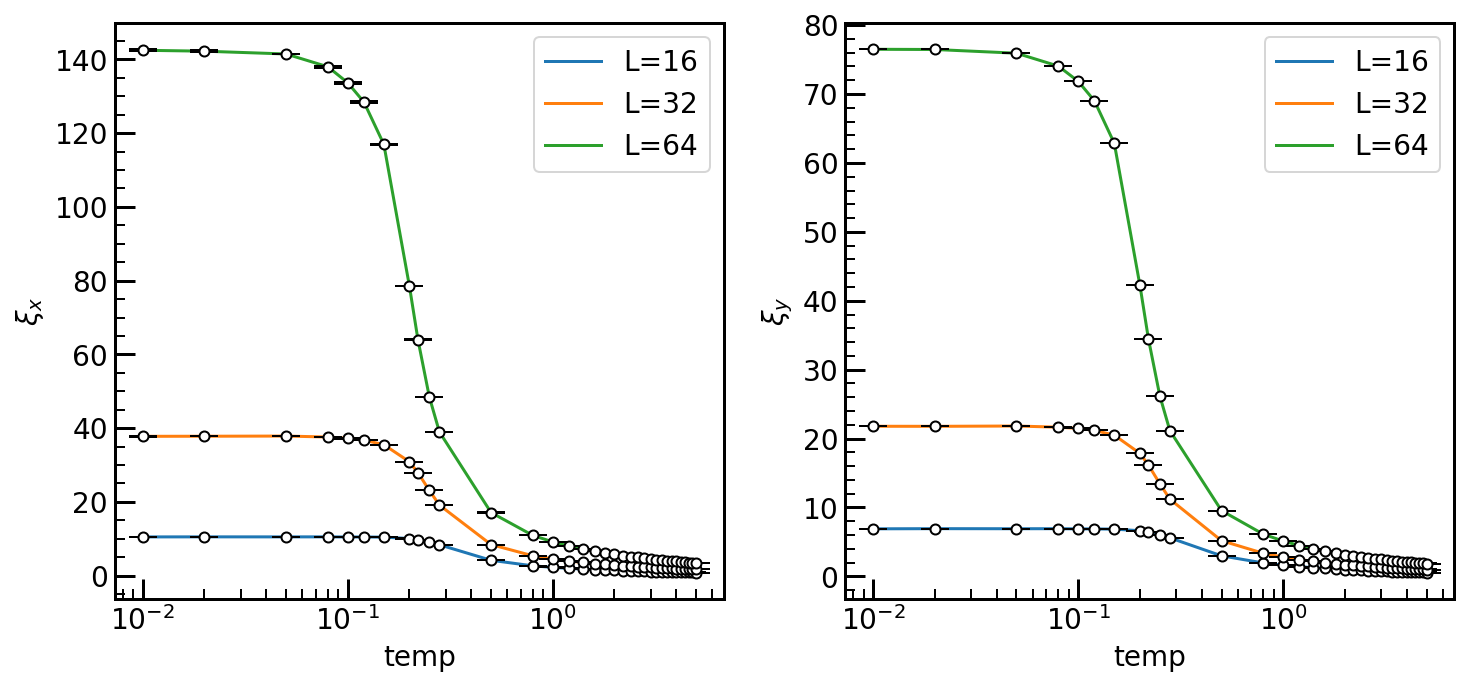

In [71]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2


ax1 = fig.add_subplot(gyou,retsu,1)
ax1.plot(temp, correlation_length_x16,label="L=16")
ax1.plot(temp, correlation_length_x32,label="L=32")
ax1.plot(temp, correlation_length_x64,label="L=64")
ax1.errorbar(temp,correlation_length_x16,yerr=correlation_length_x_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp,correlation_length_x32,yerr=correlation_length_x_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.errorbar(temp,correlation_length_x64,yerr=correlation_length_x_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("$\\xi_x$")
ax1.set_xlabel("temp")
ax1.set_xscale("log")
ax1.legend(loc=1)

ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(temp, correlation_length_y16,label="L=16")
ax2.plot(temp, correlation_length_y32,label="L=32")
ax2.plot(temp, correlation_length_y64,label="L=64")
ax2.errorbar(temp,correlation_length_y16,yerr=correlation_length_y_err16,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.errorbar(temp,correlation_length_y32,yerr=correlation_length_y_err32,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.errorbar(temp,correlation_length_y64,yerr=correlation_length_y_err64,capsize=7,fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax2.set_ylabel("$\\xi_y$")
ax2.set_xlabel("temp")
ax2.set_xscale("log")
ax2.legend(loc=1)

# ax3 = fig.add_subplot(gyou,retsu,3)
# N = {64*32, 32*16, 16*8}
# S = {static_S64[0],static_S32[0],static_S16[0]}
# ax3.plot(1/N,S/N)

# **別々でグラフ化**

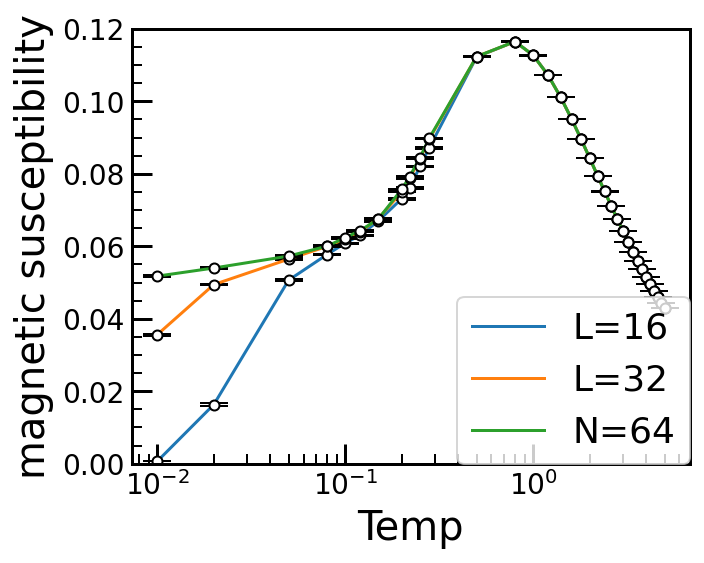

In [9]:
x = temp
plt.figure(figsize=(lx_graph,ly_graph))

y16 = usus16
y_err16 = usus_err16
plt.errorbar(x, y16, yerr = y_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x, y16,label="L=16")

y32 = usus32
y_err32 = usus_err32
plt.errorbar(x, y32, yerr = y_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x, y32,label="L=32")

y64 = usus64
y_err64 = usus_err64
plt.errorbar(x, y64, yerr = y_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x, y64,label="N=64")

plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('magnetic susceptibility', fontsize=20)
plt.xscale('log')

plt.legend(loc=4, borderaxespad=0, fontsize=18)
# plt.savefig('y_error_bar.png')

Text(3, 3, 'C = 3.721')

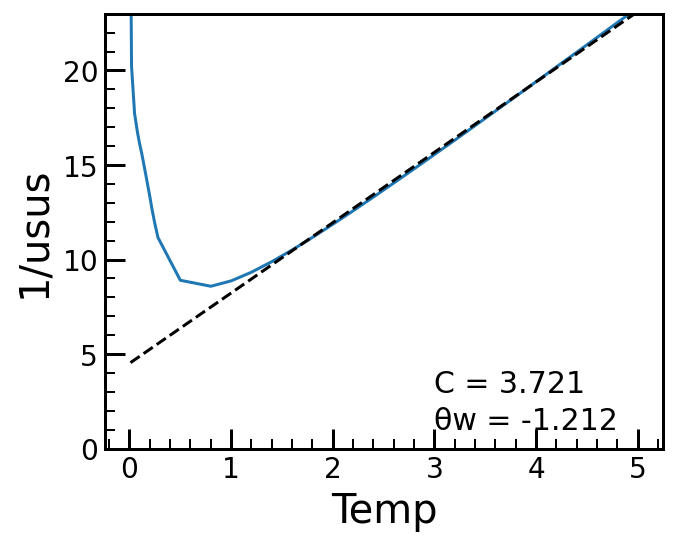

In [ ]:
x = temp
plt.figure(figsize=(lx_graph,ly_graph))

y = 1/usus32
# y_err = usus_err
plt.plot(x, y)
plt.ylim(0,23)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('1/usus', fontsize=20)
# plt.xscale('log')

chaifit = CW_fit(x,y,1,5,1)
xx = temp
yy = chaifit[2]*xx + chaifit[3]
plt.plot(xx,yy,"--",color = "0")
plt.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
plt.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

# plt.savefig('y_error_bar.png')

AttributeError: ignored

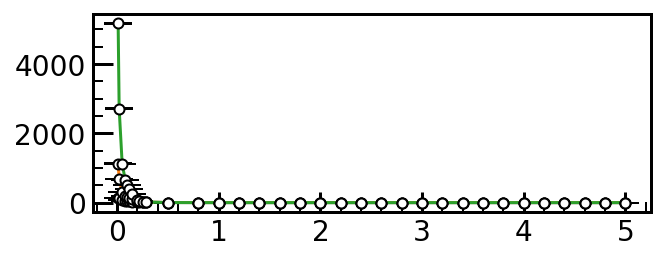

In [ ]:
x = temp
fig = plt.figure(figsize=(lx_graph,ly_graph))

ax1 = fig.add_subplot(2,1,1)
y16 = ssus16
y_err16 = ssus_err16
ax1.errorbar(x, y16, yerr = y_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.plot(x,y16,label="L=16")

y32 = ssus32
y_err32 = ssus_err32
ax1.errorbar(x, y32, yerr = y_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.plot(x,y32,label="L=32")

y64 = ssus64
y_err64 = ssus_err64
ax1.errorbar(x, y64, yerr = y_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.plot(x,y64,label="L=64")

ax1.xlabel('Temp', fontsize=20)
ax1.ylabel('staggered susceptibility', fontsize=20)
ax1.ylim(0,)
ax1.xscale("log")
ax1.legend(loc=1, borderaxespad=0, fontsize=18)

# plt.savefig('y_error_bar.png')

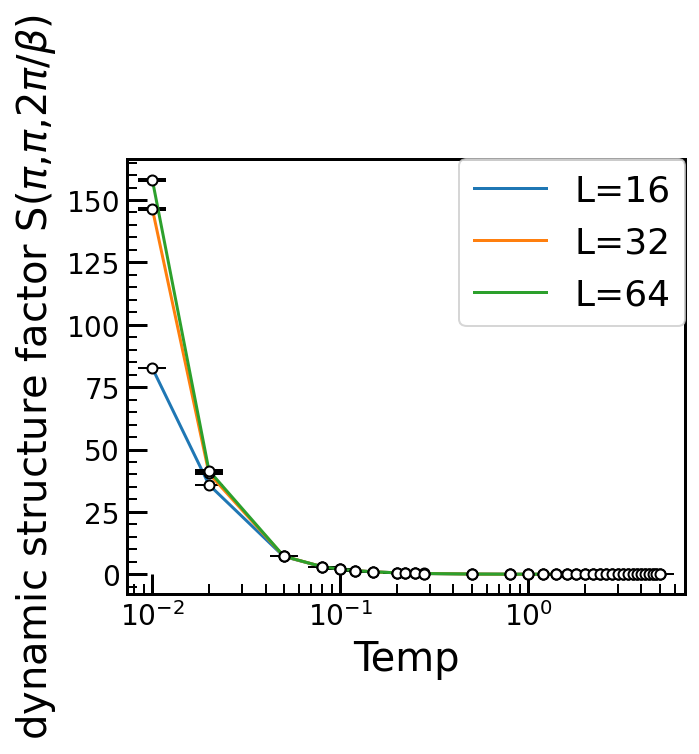

In [ ]:
x = temp
plt.figure(figsize=(lx_graph,ly_graph))

y16 = dynamic_S16
y_err16 = dynamic_S_err16
plt.errorbar(x, y16, yerr = y_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x,y16,label="L=16")

y32 = dynamic_S32
y_err32 = dynamic_S_err32
plt.errorbar(x, y32, yerr = y_err32, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x,y32,label="L=32")

y64 = dynamic_S64
y_err64 = dynamic_S_err64
plt.errorbar(x, y64, yerr = y_err64, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x,y64,label="L=64")

plt.xlabel('Temp', fontsize=20)
plt.ylabel('dynamic structure factor S($\pi$,$\pi$,2$\pi$/$\\beta$)', fontsize=20)
plt.xscale("log")
plt.legend(loc=1, borderaxespad=0, fontsize=18)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'static structure factor S($\\pi$,$\\pi$)')

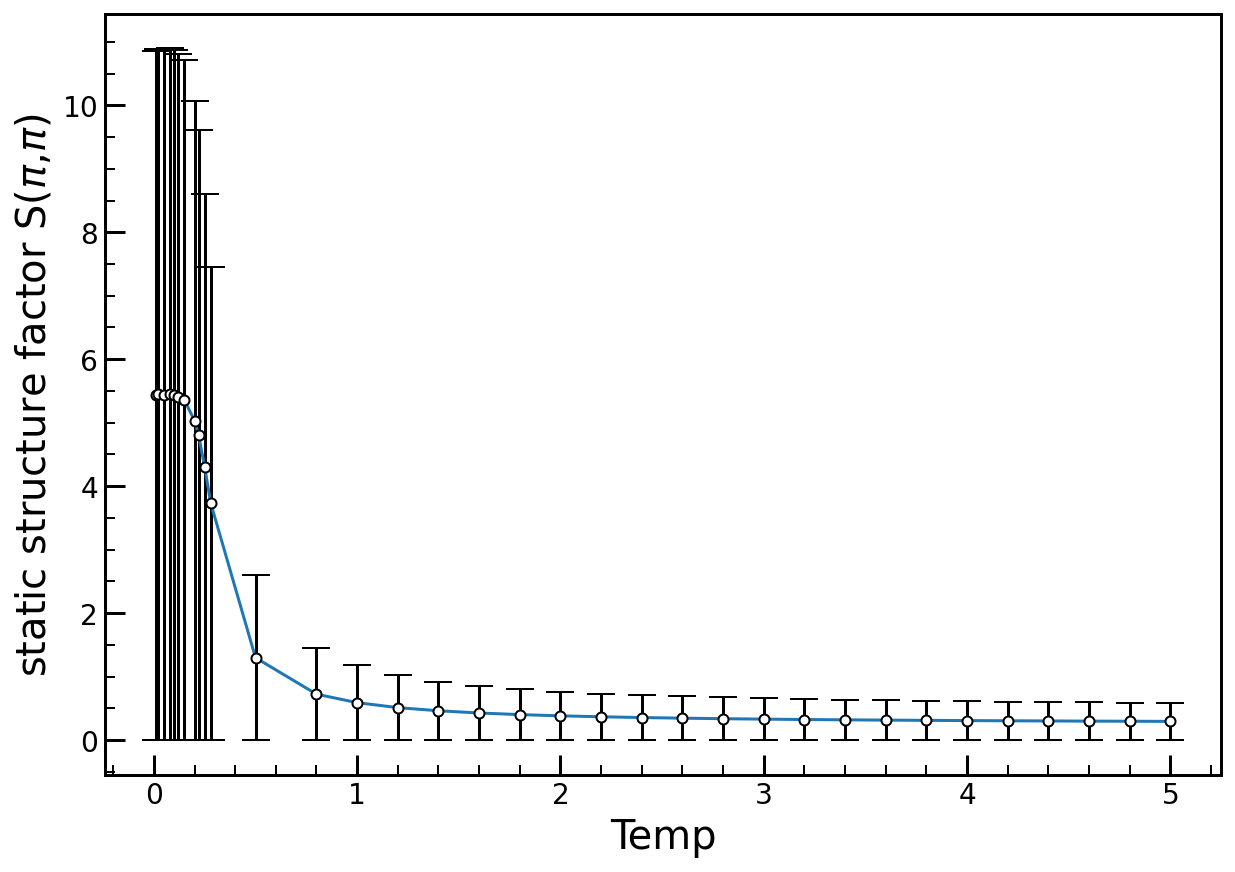

In [ ]:
x = temp
y = static_S16
y_err = static_S16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('static structure factor S($\pi$,$\pi$)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, '<Nz Nz Nz Nz>')

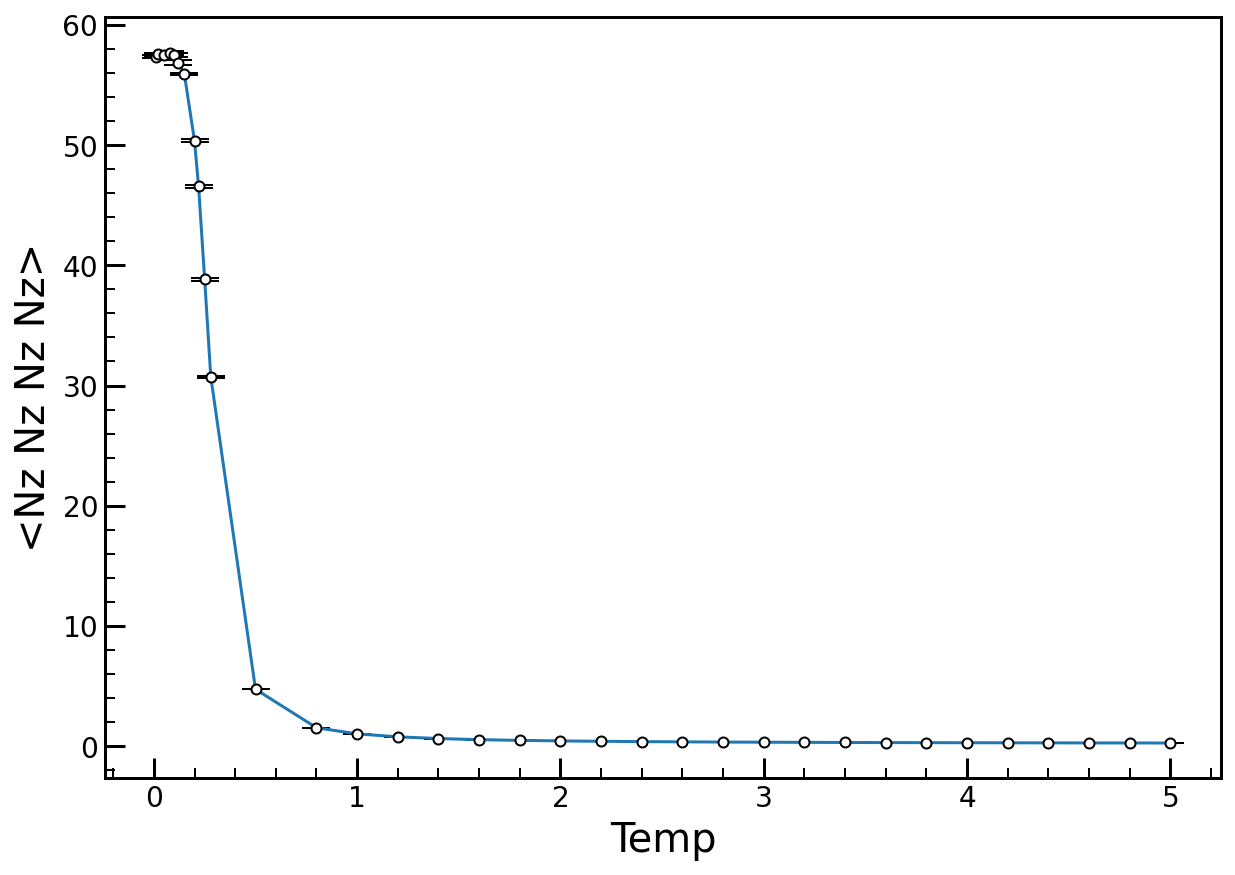

In [ ]:
x = temp
y = Nz16
y_err = Nz_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('<Nz Nz Nz Nz>', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'static structure factor S($\\pi$+2$\\pi$/L,$\\pi$)')

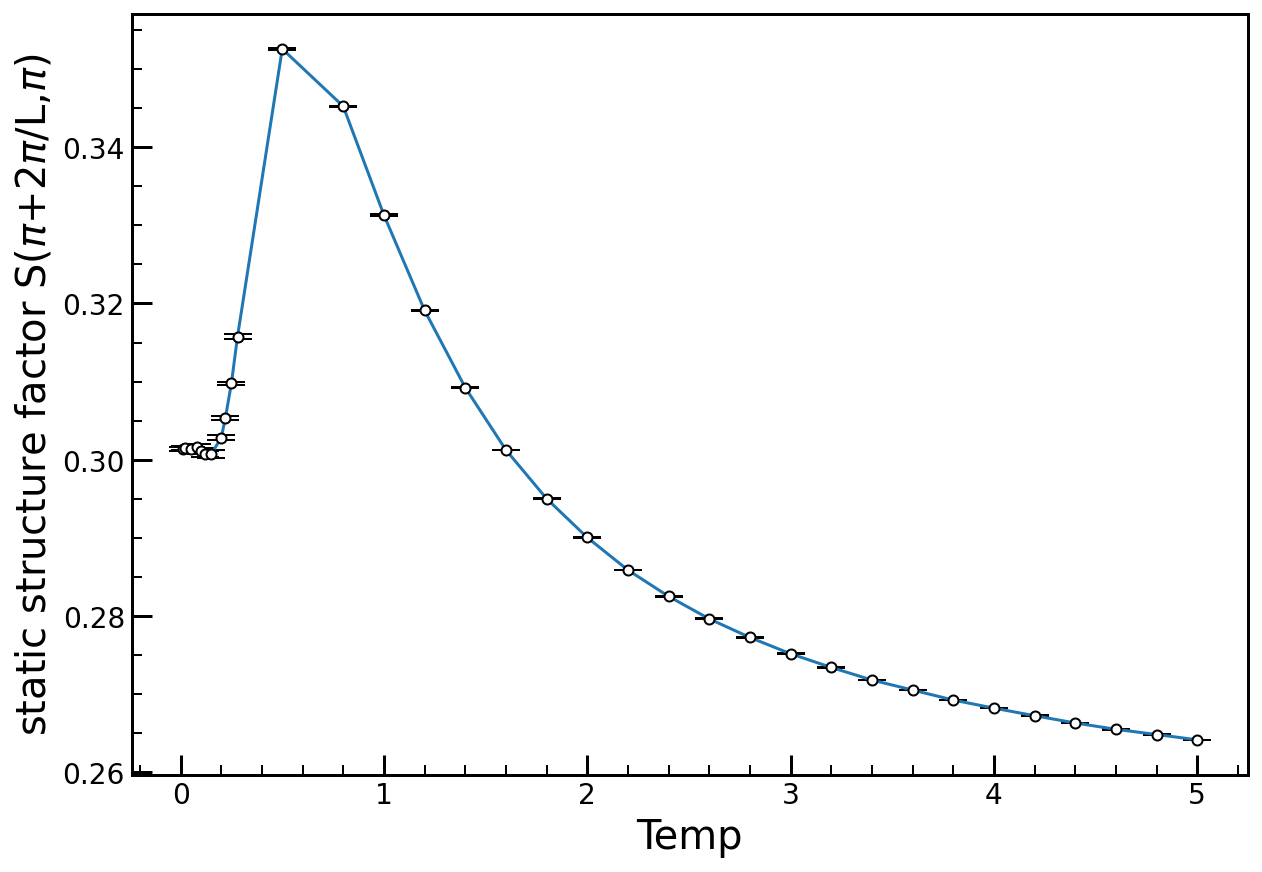

In [ ]:
x = temp
y = static_S216
y_err = static_S2_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('static structure factor S($\pi$+2$\pi$/L,$\pi$)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'dynamic structure factor S($\\pi$,$\\pi$+2$\\pi$/L)')

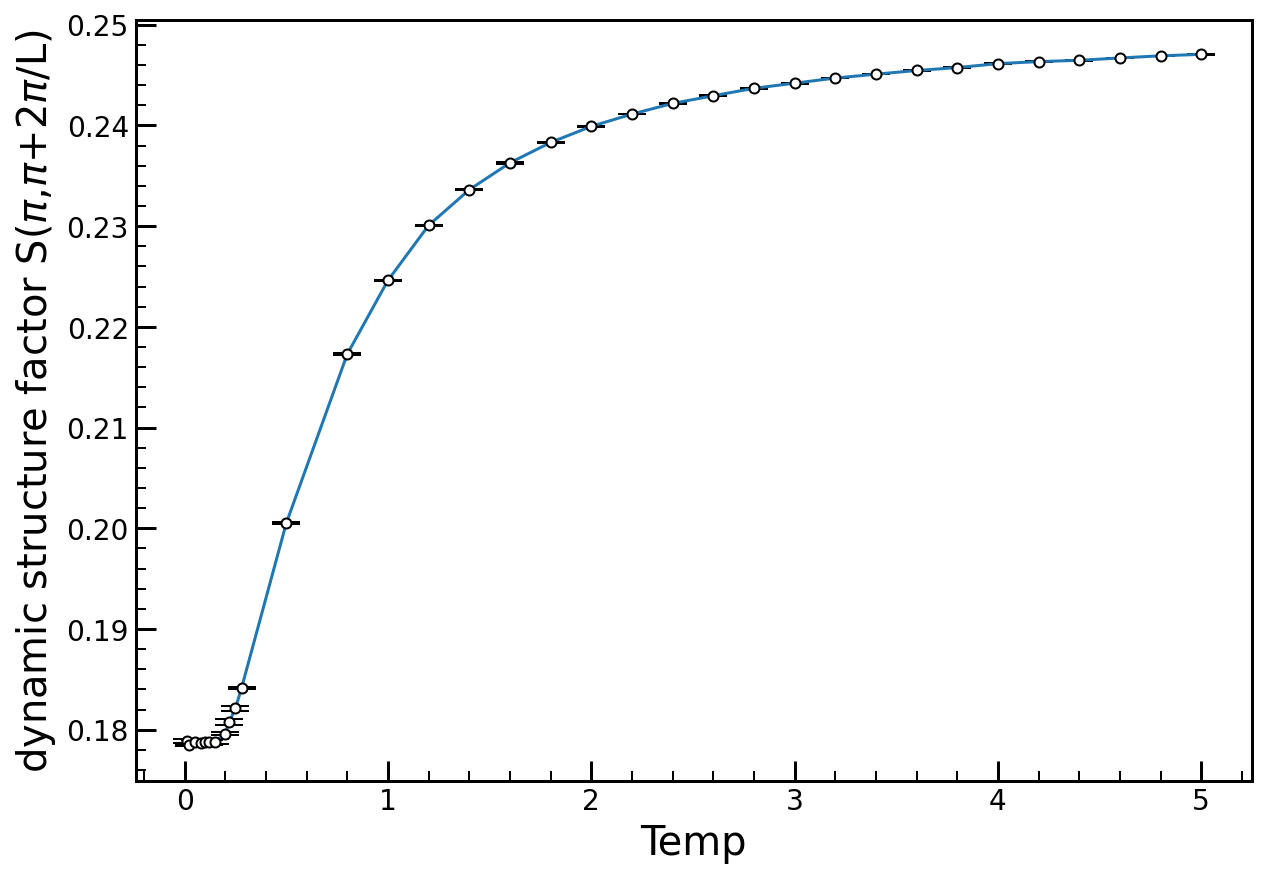

In [ ]:
x = temp
y = static_S316
y_err = static_S3_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('dynamic structure factor S($\pi$,$\pi$+2$\pi$/L)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, '$\\Delta$^-1')

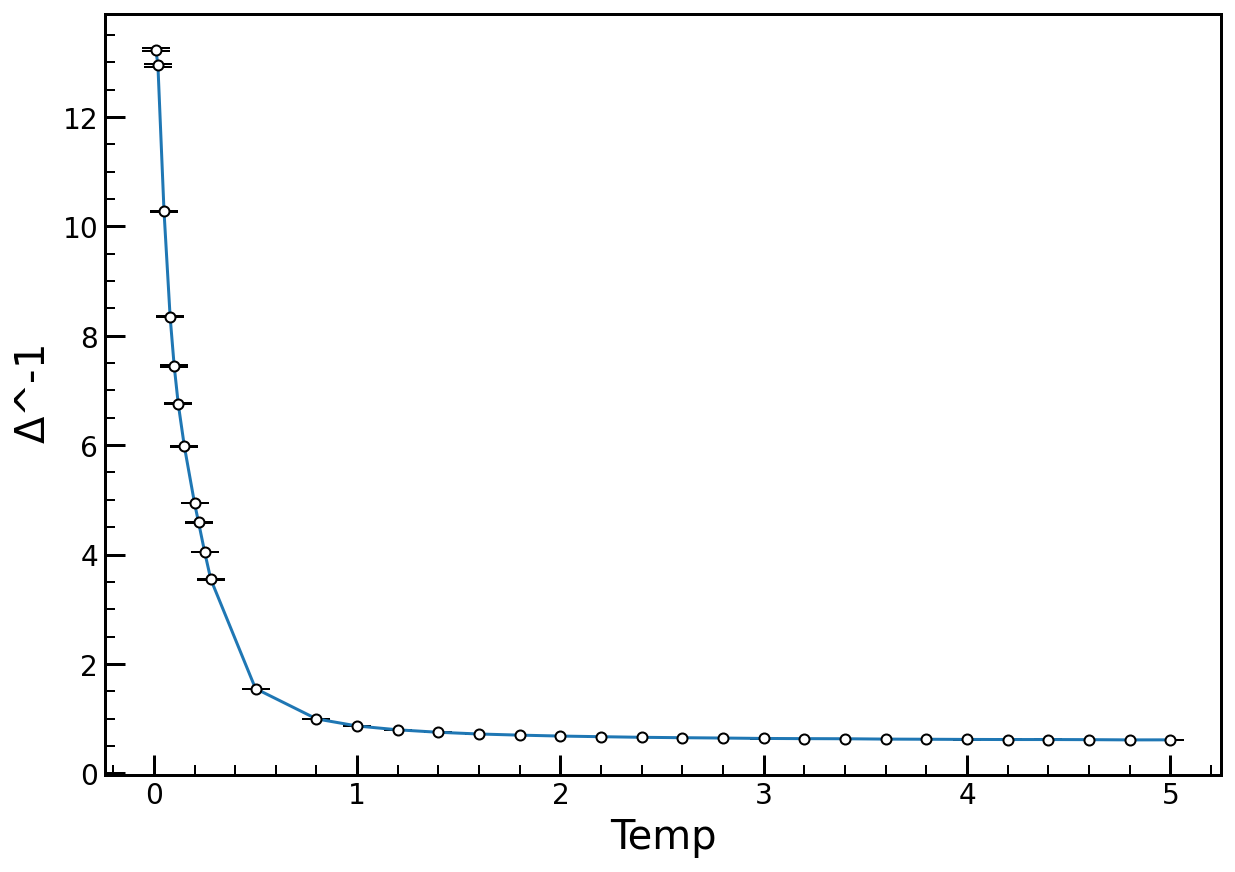

In [ ]:
x = temp
y = inverse_gap16
y_err = inverse_gap_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('$\Delta$^-1', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'correlation length x')

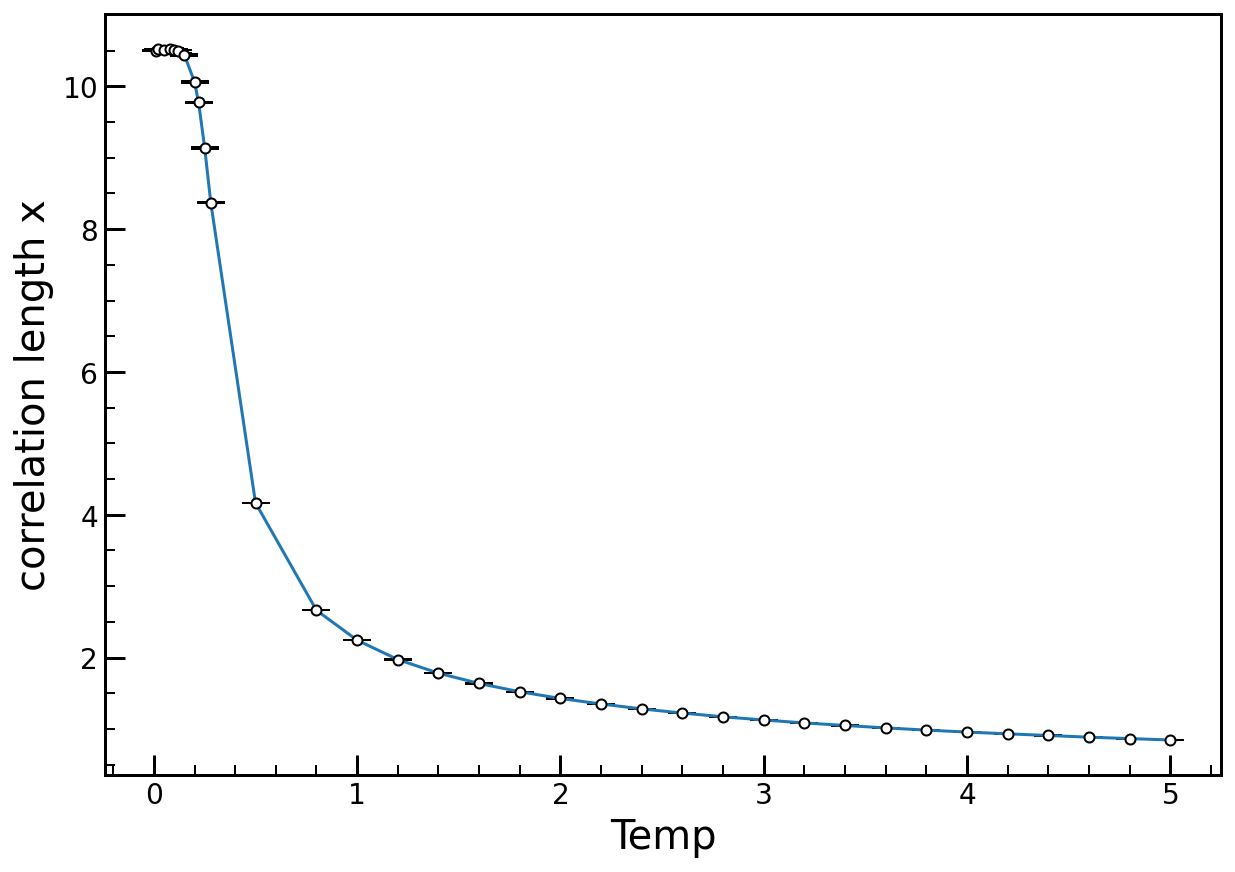

In [ ]:
x = temp
y = correlation_length_x16
y_err = correlation_length_x_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('correlation length x', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'correlation length y')

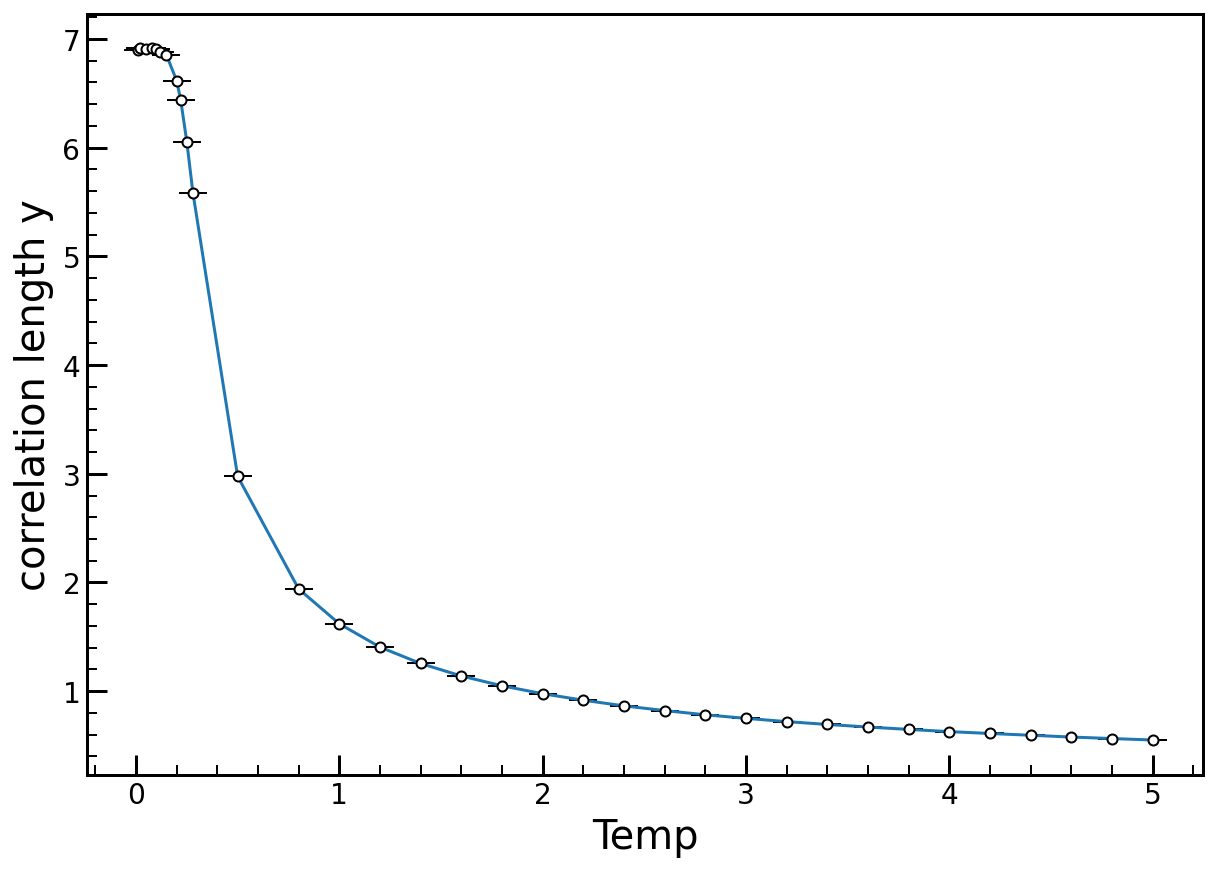

In [ ]:
x = temp
y = correlation_length_y16
y_err = correlation_length_y_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('correlation length y', fontsize=20)


# plt.savefig('y_error_bar.png')

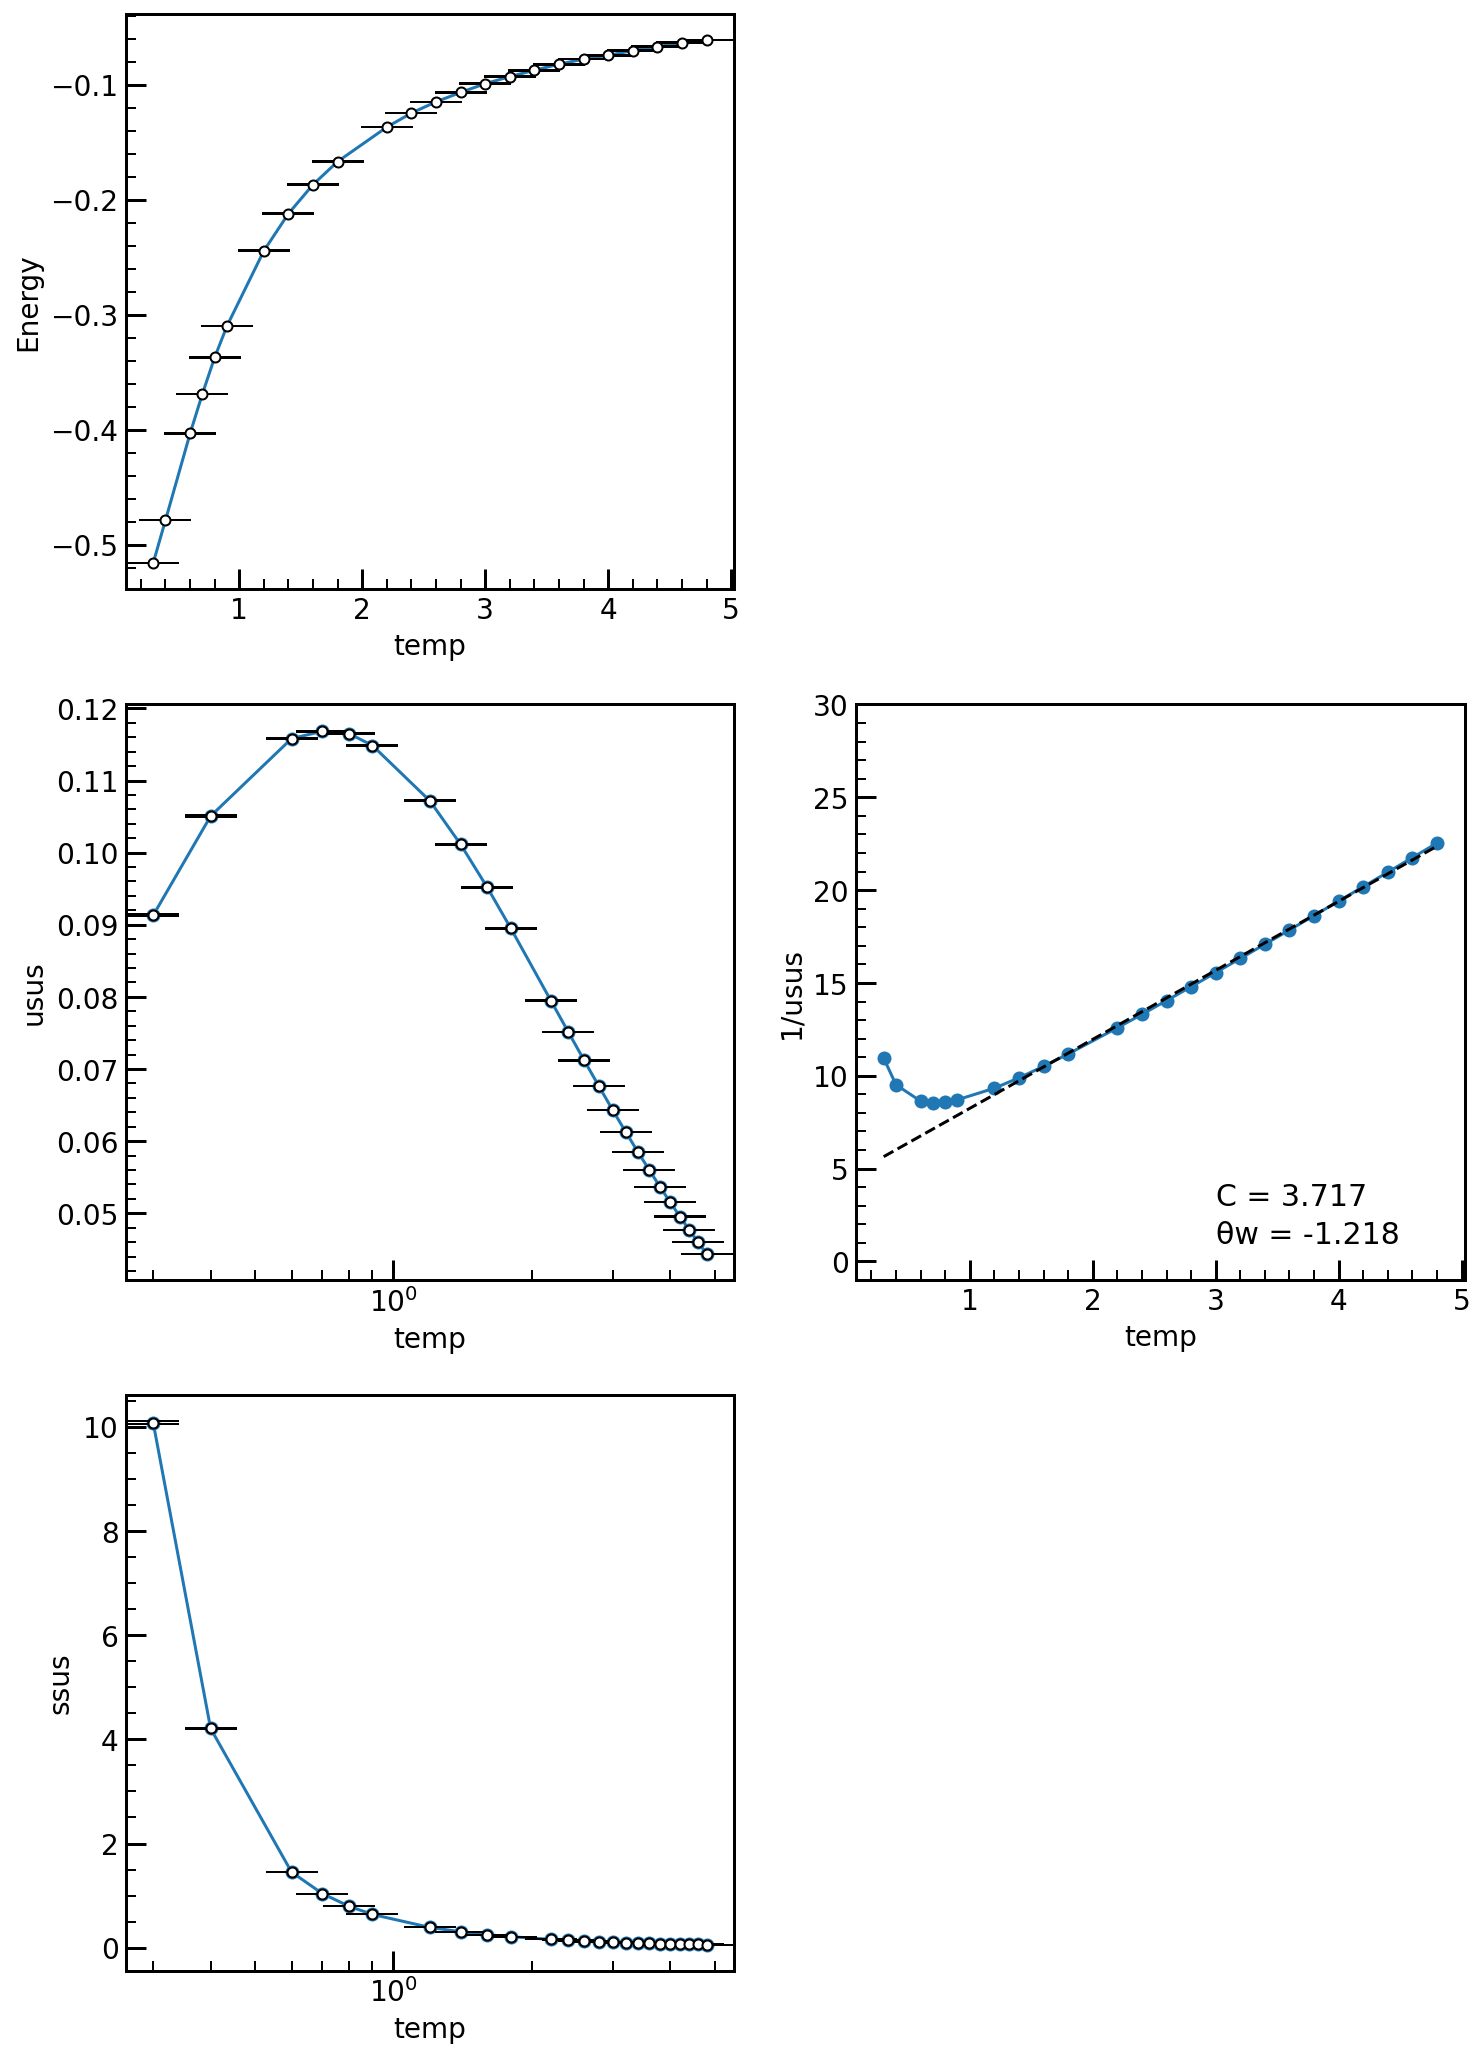

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, energy)
ax1.errorbar(temp, energy, yerr = energy_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("Energy")
ax1.set_xlabel("temp")

ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp, usus, marker ='o', label="test")
ax3.errorbar(temp, usus, yerr = usus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("usus")
ax3.set_xscale('log')
ax3.set_xlabel("temp")


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp, 1/usus, marker ='o', label="test")
ax4.set_ylabel("1/usus")
ax4.set_xlabel("temp")
ax4.set_ylim(-1,30)
# ax4.set_ylim(-1,22)
#以下は最小二乗法
chaifit = CW_fit(temp,1/usus, 1,5,1)
x = temp
y = chaifit[2]*x + chaifit[3]
ax4.plot(x,y,"--",color = "0")
ax4.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
ax4.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp, ssus, marker ='o', label="test")
ax5.errorbar(temp, ssus, yerr = ssus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("ssus")
# ax2.set_xlim(0,1)
ax5.set_xscale('log')
ax5.set_xlabel("temp")

# ax6 = fig.add_subplot(gyou,retsu,6)
# ax6.plot(temp, 1/ssus, marker ='o', label="test")
# ax6.set_ylabel("1/ssus")
# # ax6.set_xscale('log')
# ax6.set_xlabel("temp")
# #以下は最小二乗法
# chaifit = CW_fit(temp,1/ssus, 1,5,1)
# x = temp
# y = chaifit[2]*x + chaifit[3]
# ax6.plot(x,y,"--",color = "0")
# ax6.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
# ax6.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

plt.show()

Text(0.5, 0, 'temp')

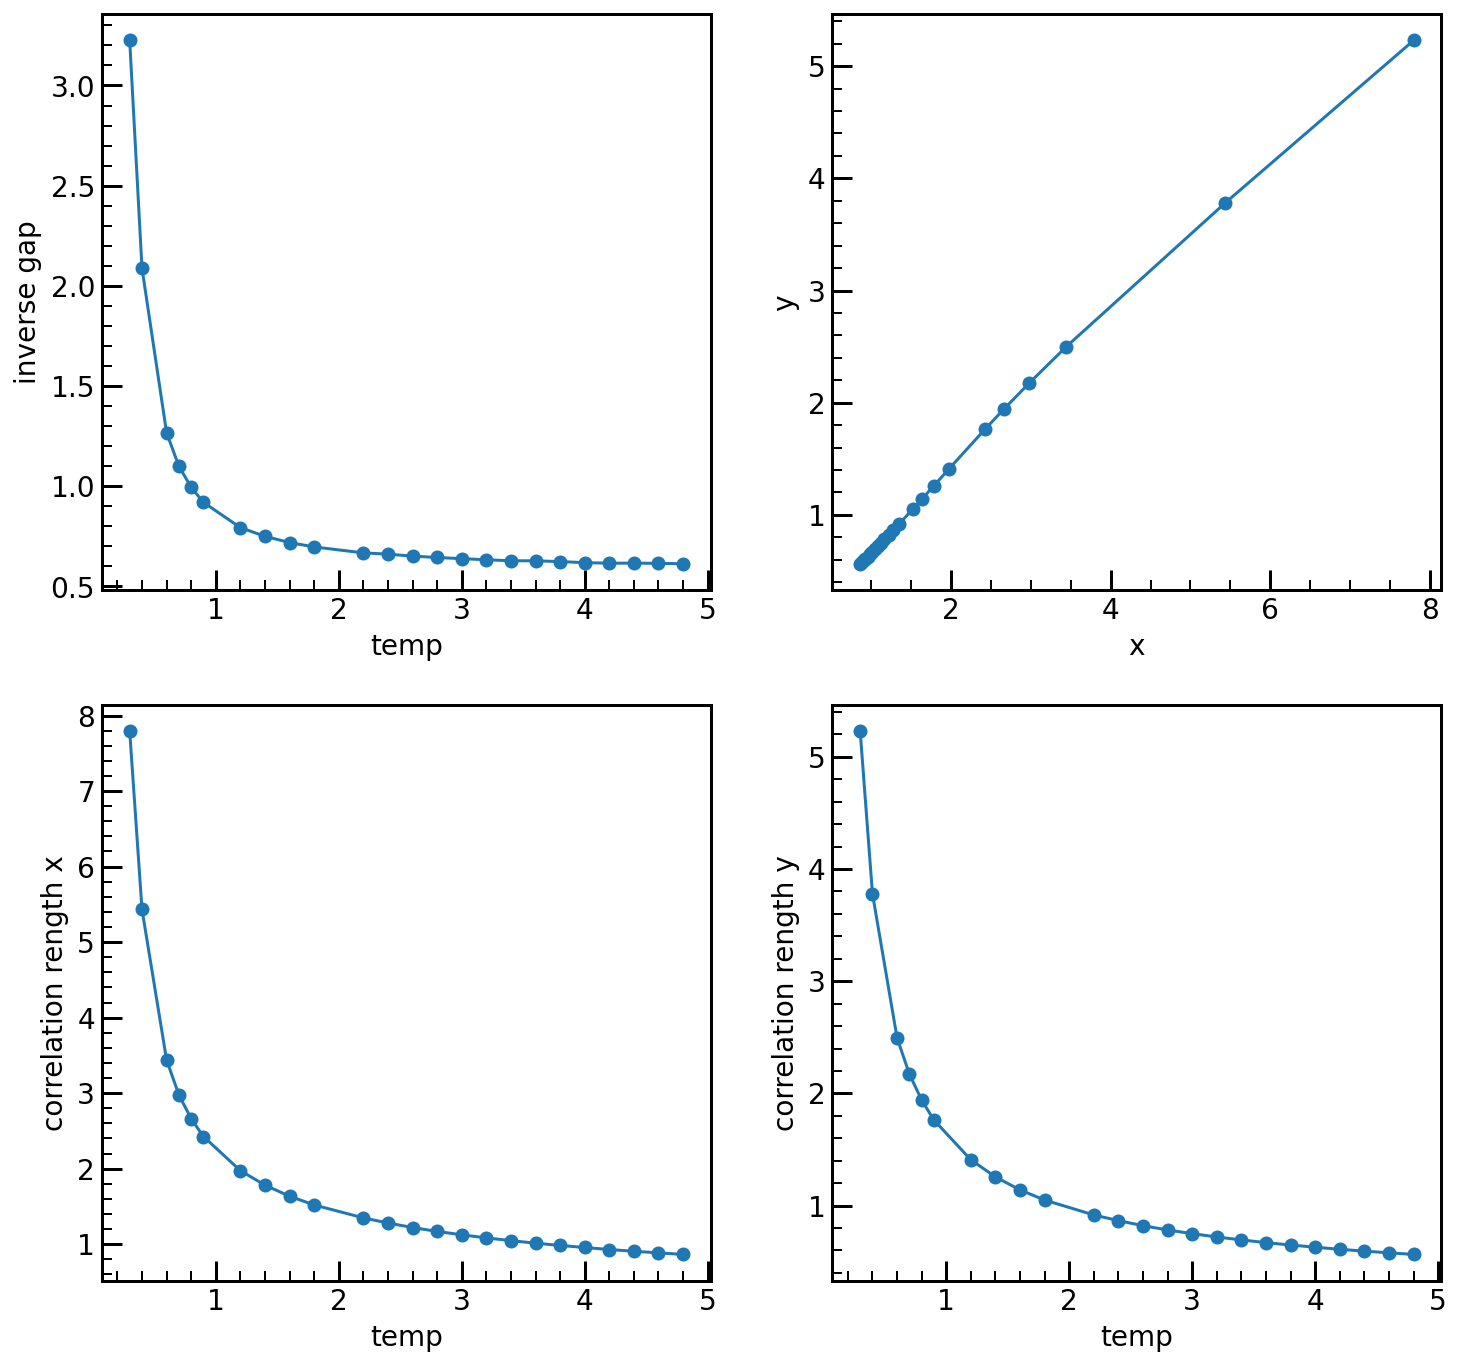

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, inverse_gap, marker ='o', label="test")
ax1.set_ylabel("inverse gap")
ax1.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(correlation_length_x, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("y")
ax2.set_xlabel("x")

ax2 = fig.add_subplot(gyou,retsu,3)
ax2.plot(temp, correlation_length_x, marker ='o', label="test")
ax2.set_ylabel("correlation rength x")
ax2.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,4)
ax2.plot(temp, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("correlation rength y")
ax2.set_xlabel("temp")